<a href="https://colab.research.google.com/github/PuttupuR/My-Project/blob/main/Ensemble_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
X = dataset.data
Y = dataset.target

In [ ]:
#Binary classification Model
import numpy as np
np.unique(Y,return_counts = True)

(array([0, 1]), array([212, 357]))

In [ ]:
X.shape

(569, 30)

In [ ]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
import pandas as pd
df = pd.DataFrame(X, columns = dataset.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#Bagging Model
#For Decision Tree based models you don't need to scale your data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs = -1)
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)
cross_val_score(model, X, Y, cv = skf, scoring = 'accuracy').mean()

0.9631268436578171

In [ ]:
#Hyper-Parameters for RF
#max_features
#n_estimators
#max_samples
#pre-pruning Heuristics
#post pruning Heuristics

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [50,100,150,200],
          'criterion':['gini','entropy'],
          'max_features':[0.1,0.25,'sqrt',0.5,0.75,1],
          'max_samples':[0.5,0.75,0.9,None],
          'ccp_alpha':[0,0.001,0.0001]
}
gcv = GridSearchCV(model, param_grid = params, cv = skf, scoring ='accuracy')
gcv.fit(X,Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'ccp_alpha': [0, 0.001, 0.0001],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [0.1, 0.25, 'sqrt', 0.5, 0.75, 1],
                         'max_samples': [0.5, 0.75, 0.9, None],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
gcv.best_params_

{'ccp_alpha': 0,
 'criterion': 'entropy',
 'max_features': 0.25,
 'max_samples': 0.9,
 'n_estimators': 100}

In [ ]:
gcv.best_score_

0.9701443875174661

In [ ]:
#Adaptive Boosting (AdaBoost)-->it use DT by default
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
cross_val_score(model, X, Y, cv = skf, scoring = 'accuracy').mean()

0.9718677224033534

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000000)
cross_val_score(model, X, Y, cv = skf,scoring = 'accuracy').mean()

0.9507995652848935

In [ ]:
model = AdaBoostClassifier(base_estimator = LogisticRegression(max_iter = 100000), n_estimators = 150)
cross_val_score(model, X, Y, cv = skf,scoring = 'accuracy').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9543238627542306

In [ ]:
from sklearn.svm import SVC
model = SVC()
cross_val_score(model, X, Y, cv = skf,scoring = 'accuracy').mean()

0.9121720229777983

In [ ]:
model = AdaBoostClassifier(base_estimator = SVC(probability = True), n_estimators = 150)
cross_val_score(model, X, Y, cv = skf,scoring = 'accuracy').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8962583449774879

In [ ]:
model = RandomForestClassifier(n_jobs = -1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size = 0.3, random_state = 1)
model.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
model.predict(x_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(x_test))

0.9590643274853801

In [ ]:
model.feature_importances_

array([0.06319082, 0.0151313 , 0.07572218, 0.0252521 , 0.00628838,
       0.01317612, 0.03545048, 0.05974368, 0.00337542, 0.0029086 ,
       0.01381546, 0.00380817, 0.00676926, 0.02567889, 0.00404169,
       0.00364637, 0.00779917, 0.00337351, 0.00514893, 0.00418828,
       0.11696504, 0.01939828, 0.13532689, 0.14817103, 0.00993017,
       0.01740104, 0.06044004, 0.09820529, 0.00784852, 0.00780488])

In [ ]:
pd.DataFrame(model.feature_importances_, index = dataset.feature_names, columns = ['Importances']).sort_values(by = 'Importances', ascending = False)

,Importances
worst area,0.148171
worst perimeter,0.135327
worst radius,0.116965
worst concave points,0.098205
mean perimeter,0.075722
mean radius,0.063191
worst concavity,0.060440
mean concave points,0.059744
mean concavity,0.035450
area error,0.025679


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(x_test))
res = []
res.append(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
from sklearn.feature_selection import RFE
res = []
model = RandomForestClassifier()
for i in range(29, 0, -1):
  rfe = RFE(model, n_features_to_select = i)
  rfe.fit(x_train, y_train)
  re_train = x_train[:,rfe.support_]
  model.fit(re_train, y_train)
  print("with", i, "features, the accuracy is :",accuracy_score(y_test, model.predict(x_test[:,rfe.support_])))
  res.append(accuracy_score(y_test, model.predict(x_test[:,rfe.support_])))

with 29 features, the accuracy is : 0.9473684210526315
with 28 features, the accuracy is : 0.9532163742690059
with 27 features, the accuracy is : 0.9415204678362573
with 26 features, the accuracy is : 0.9649122807017544
with 25 features, the accuracy is : 0.9590643274853801
with 24 features, the accuracy is : 0.9532163742690059
with 23 features, the accuracy is : 0.9473684210526315
with 22 features, the accuracy is : 0.9590643274853801
with 21 features, the accuracy is : 0.9532163742690059
with 20 features, the accuracy is : 0.9649122807017544
with 19 features, the accuracy is : 0.9415204678362573
with 18 features, the accuracy is : 0.9415204678362573
with 17 features, the accuracy is : 0.9532163742690059
with 16 features, the accuracy is : 0.9590643274853801
with 15 features, the accuracy is : 0.9532163742690059
with 14 features, the accuracy is : 0.9590643274853801
with 13 features, the accuracy is : 0.9590643274853801
with 12 features, the accuracy is : 0.9532163742690059
with 11 fe

Text(0, 0.5, 'Accuracy')

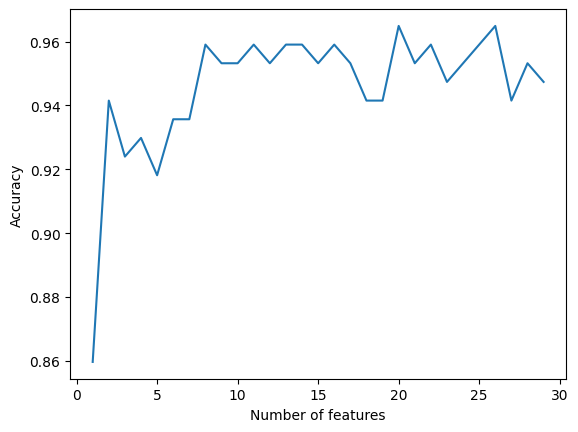

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(29,0,-1),res)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')

In [ ]:
max(res)

0.9649122807017544

In [ ]:
30- res.index(max(res)) #best no of features

27

In [ ]:
model = AdaBoostClassifier()
model.fit(x_train,y_train)

